In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [23]:
from __future__ import absolute_import,division,print_function
import sys
import os

import pandas as pd
import numpy as np 

In [24]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
#Display and Plotting 
import matplotlib.pylab as plt 
import seaborn as sns 

In [25]:
pd.set_option('display.float_format',lambda x:'%.5f ' % x) # pandas 
 
np.set_printoptions(precision=5,suppress=True) # numpy  
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
# seaborn plotting style 
sns.set(style='ticks',context='poster')

In [26]:
# Read the data 
# 美国消费者信心指数 
Sentiment='data/sentiment.csv'
Sentiment=pd.read_csv(Sentiment,index_col=0,parse_dates=[0])

In [29]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [30]:
#Select the series from 2005-2016 
sentiment_short=Sentiment.loc['2005':'2016']

In [31]:
sentiment_short.shape

(139, 1)

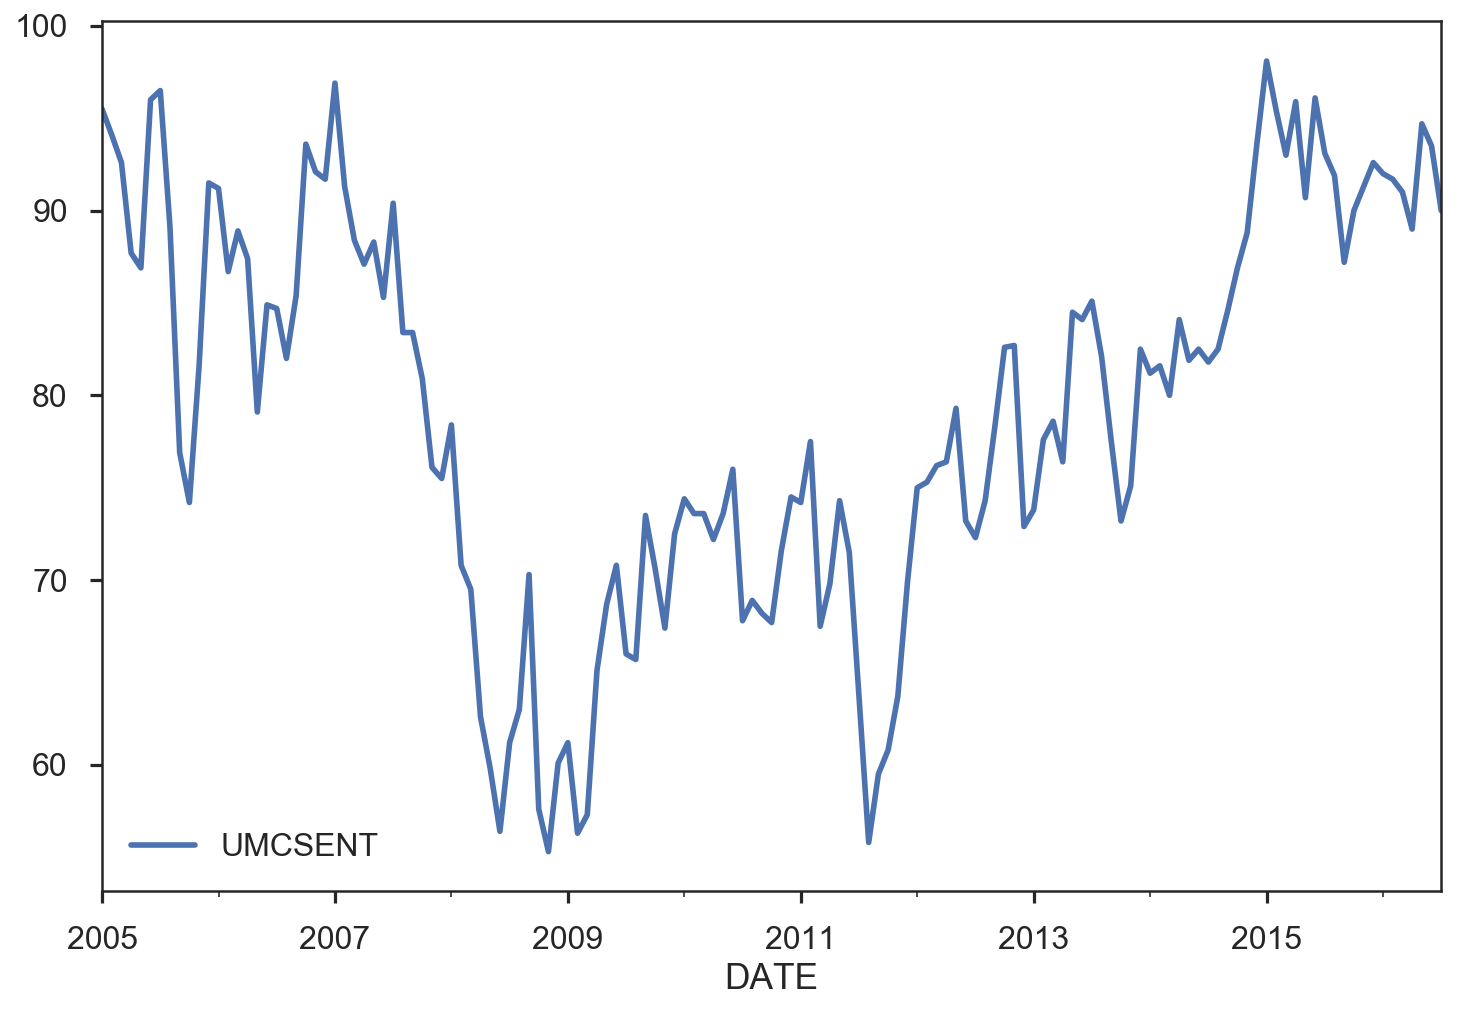

In [32]:
sentiment_short.plot(figsize=(12,8))

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e4864deb8>,
      dtype=object)

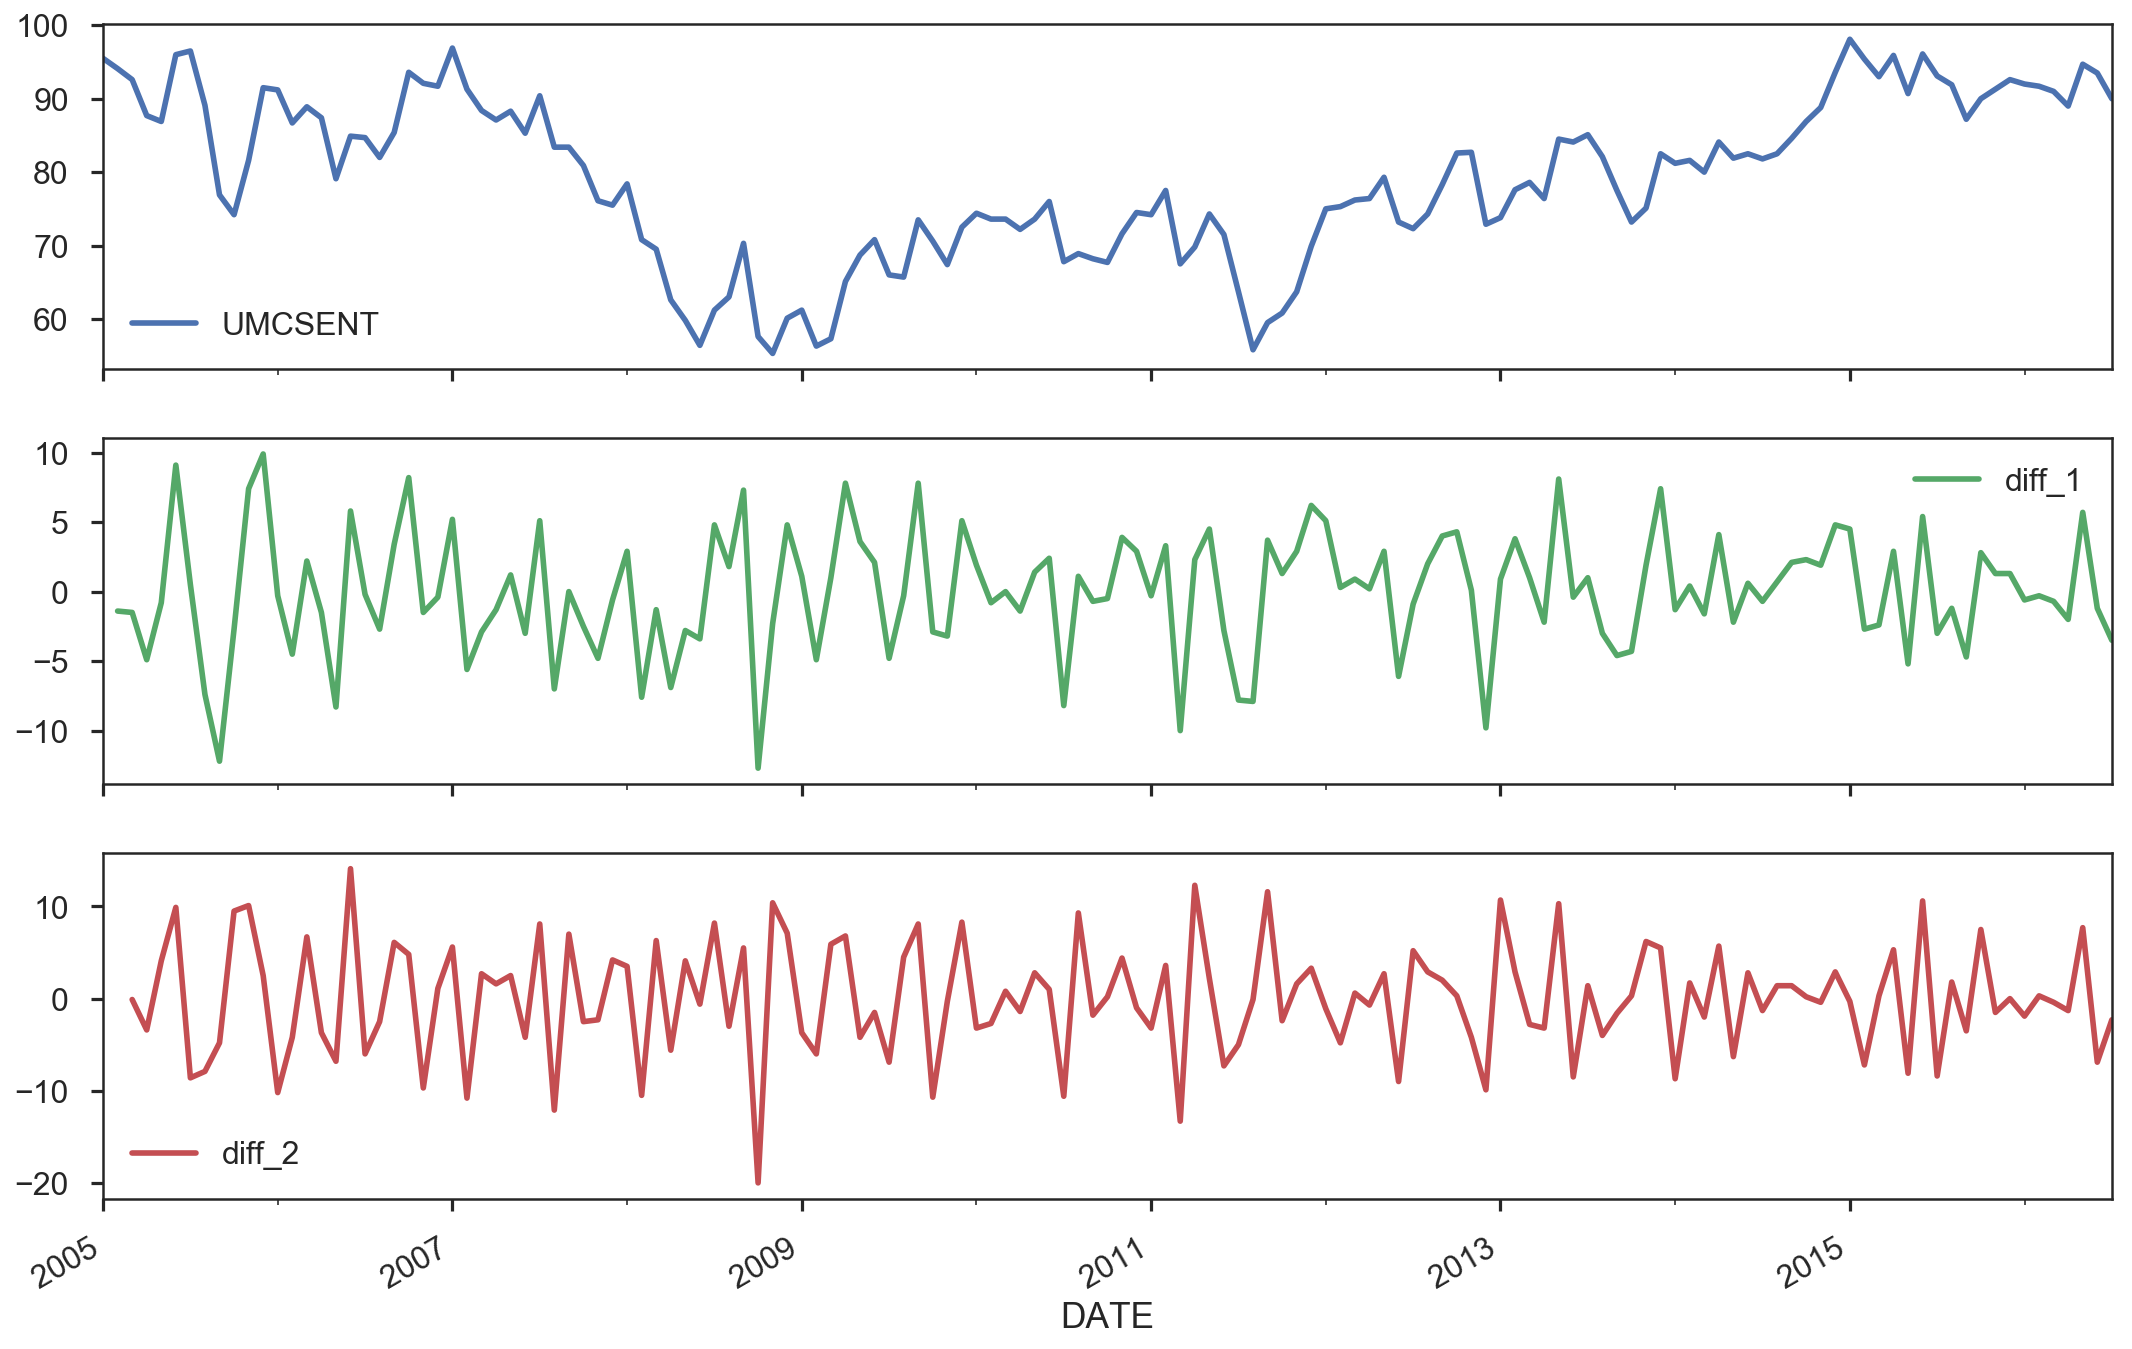

In [34]:
sentiment_short['diff_1']=sentiment_short['UMCSENT'].diff(1)
sentiment_short['diff_2']=sentiment_short['diff_1'].diff(1)
sentiment_short.plot(subplots=True,figsize=(18,12))

In [35]:
sentiment_short.head()

,UMCSENT,diff_1,diff_2
DATE,,,
2005-01-01,95.50000,nan,nan
2005-02-01,94.10000,-1.40000,nan
2005-03-01,92.60000,-1.50000,-0.10000
2005-04-01,87.70000,-4.90000,-3.40000
2005-05-01,86.90000,-0.80000,4.10000
